In [4]:
#@title MONTAR EL DRIVE  (If you are in in colab){ display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/RESEARCH/2022_SPDlearning_MiniCourse')
print(os.getcwd())

import sys
sys.path.append("/content/drive/MyDrive/RESEARCH/2022_SPDlearning_MiniCourse/")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/RESEARCH/2022_SPDlearning_MiniCourse


In [90]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import scipy
import itertools

You can find a dataset with two classes (0 and 1) in this path: ``data/COVS_dataset/*`` 

Each file is a covariance matrix of dimension (20,20). 

Nomenclature: A_BB_CC.npy

Here, A is 0 or 1, BB is 00, 01, ..., or 12, and CC is a sample for each BB, there are a total of 5 samples: 00, 01, ... 04.


Ejemplo directorio leido:  data/COVS_dataset/0_01_01.npy
Matrices de covarianza de tamaño: (20, 20)



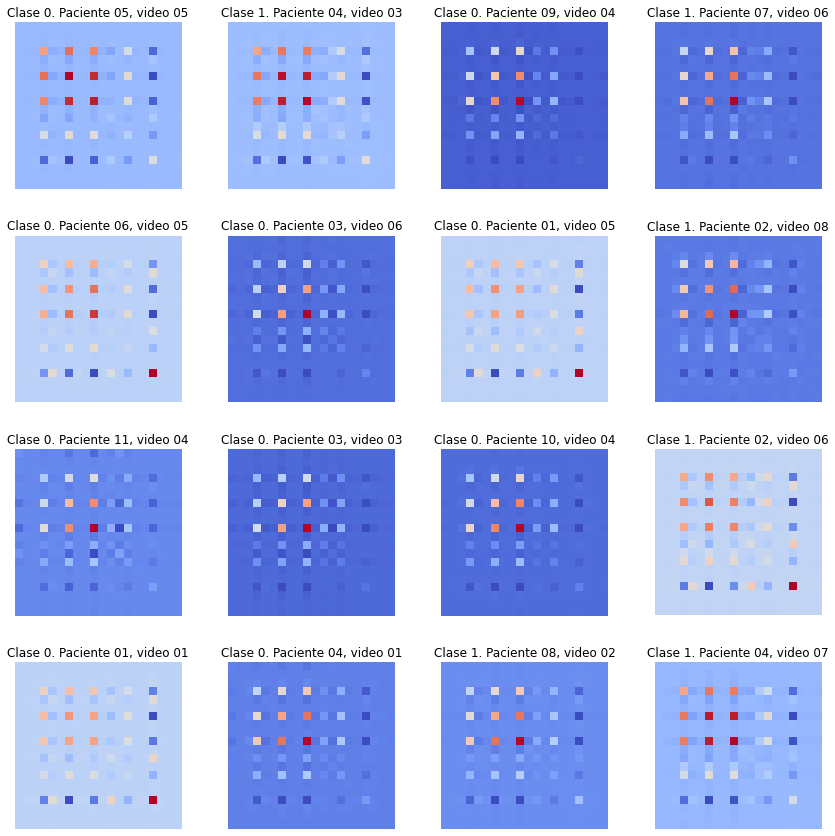

In [11]:
dir_covs = sorted(glob.glob('data/COVS_dataset/*.npy')) #Se listan los nombres de los archivos en ese directorio
print('Ejemplo directorio leido: ',dir_covs[0])
dirs_covs_prueba = np.random.choice(dir_covs,16) #Tomamos 16 aleatoriamente de prueba
s = np.load(dirs_covs_prueba[0]).shape #Se carga una matriz de cov de ejemplo
print(f'Matrices de covarianza de tamaño: {s}\n')

n_rows, n_cols = 4,4
fig, axs = plt.subplots(n_rows, n_cols, figsize=(12,12))
count = 0
for i in range(n_rows):
  for j in range(n_cols):
    dir_cov = dirs_covs_prueba[count]
    clase, n_subj, n_sample = dir_cov.split('/')[-1].split('.')[0].split('_')                                                                           
    cov_matrix = np.load(dir_cov)
    axs[i,j].imshow(cov_matrix, cmap = "coolwarm")
    axs[i,j].set_title(f'Clase {clase}. Paciente {n_subj}, video {n_sample}')
    axs[i,j].set_axis_off()
    count +=1

plt.tight_layout()
plt.show()



Let's upload a random covariance matrix and see their Eigenvectors and eigenvalues.

In [95]:
cov_matrix = np.load("data/COVS_dataset/0_01_01.npy")

eigvals, eigvects = np.linalg.eigh(cov_matrix)

print(f"eigvals shape: {eigvals.shape}\neigvects shape: {eigvects.shape}")

eigvals shape: (20,)
eigvects shape: (20, 20)


Let's check the diagonalization:


In [96]:
cov_matrix[:4,:4]

array([[ 1.17043118e-01, -7.95245443e-03, -5.60075250e-02,
        -3.78377505e-02],
       [-7.95245443e-03,  2.63977042e-02,  1.74099735e-02,
        -2.94522076e-01],
       [-5.60075250e-02,  1.74099735e-02,  1.50853925e-01,
        -3.22189973e-01],
       [-3.78377505e-02, -2.94522076e-01, -3.22189973e-01,
         1.98812340e+01]])

In [97]:
prod = eigvects @ (np.diag(eigvals) @ eigvects.T)
prod[:4,:4]

array([[ 1.17043118e-01, -7.95245443e-03, -5.60075250e-02,
        -3.78377505e-02],
       [-7.95245443e-03,  2.63977042e-02,  1.74099735e-02,
        -2.94522076e-01],
       [-5.60075250e-02,  1.74099735e-02,  1.50853925e-01,
        -3.22189973e-01],
       [-3.78377505e-02, -2.94522076e-01, -3.22189973e-01,
         1.98812340e+01]])

Property:

$\sum \lambda_i = trace(A)$

In [98]:
np.sum(eigvals)

176.63899261286895

In [99]:
np.trace(cov_matrix)

176.63899261286892

## Explained variance

**Eigenvalues** represent the total amount of **variance** that can be 
**explained by** a given principal **component**.  

In [100]:
print(f"Eigenvalues:\n {eigvals}")

porcn_var = eigvals / np.sum(eigvals)
print(f"\n% variance:\n {porcn_var}")

cum_var = list(itertools.accumulate(eigvals[::-1] / np.sum(eigvals)))
print(f"\n cumulative variance:\n {cum_var}")

Eigenvalues:
 [1.46683303e-03 3.24532864e-03 4.88595903e-03 7.78336946e-03
 1.58204987e-02 1.64298740e-02 2.58345506e-02 2.81184409e-02
 3.43092023e-02 3.82131671e-02 4.74595394e-02 7.76327286e-02
 1.25590147e-01 1.89355673e-01 2.24423164e-01 4.07977097e-01
 5.66037749e-01 3.16121657e+00 2.31503760e+01 1.48512817e+02]

% variance:
 [8.30412927e-06 1.83726627e-05 2.76607048e-05 4.40637106e-05
 8.95640225e-05 9.30138568e-05 1.46256216e-04 1.59185922e-04
 1.94233458e-04 2.16334834e-04 2.68680990e-04 4.39499385e-04
 7.10998997e-04 1.07199249e-03 1.27051882e-03 2.30966612e-03
 3.20448923e-03 1.78964821e-02 1.31060394e-01 8.40770288e-01]

 cumulative variance:
 [0.8407702882771984, 0.971830682338385, 0.9897271644543125, 0.9929316536829534, 0.995241319804431, 0.9965118386236479, 0.9975838311128611, 0.9982948301098645, 0.9987343294945211, 0.999003010484418, 0.9992193453182788, 0.9994135787758645, 0.9995727646977267, 0.9997190209132781, 0.9998120347700576, 0.9999015987925688, 0.9999456625031936

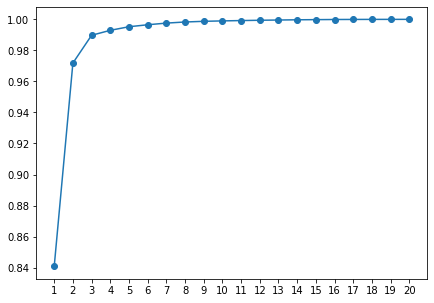

In [101]:
xx = np.arange(1,len(cum_var)+1)

plt.figure(figsize = (7,5))
plt.plot(xx,cum_var,
        marker = 'o')
# plt.plot(xx,np.log(cum_var))
plt.xticks(xx)
plt.show()

## Regularization





In [104]:
print(f"Eigenvalues:\n {eigvals}")

treshold = 0.1
new_cov = cov_matrix + treshold*np.eye(eigvals.shape[0])
new_eigvals, new_eigvects = np.linalg.eigh(new_cov)
print(f"\n% New wigenvalues:\n {new_eigvals}")
print(f"\n% New wigenvalues - {treshold}:\n {new_eigvals - treshold}")

Eigenvalues:
 [1.46683303e-03 3.24532864e-03 4.88595903e-03 7.78336946e-03
 1.58204987e-02 1.64298740e-02 2.58345506e-02 2.81184409e-02
 3.43092023e-02 3.82131671e-02 4.74595394e-02 7.76327286e-02
 1.25590147e-01 1.89355673e-01 2.24423164e-01 4.07977097e-01
 5.66037749e-01 3.16121657e+00 2.31503760e+01 1.48512817e+02]

% New wigenvalues:
 [1.01466833e-01 1.03245329e-01 1.04885959e-01 1.07783369e-01
 1.15820499e-01 1.16429874e-01 1.25834551e-01 1.28118441e-01
 1.34309202e-01 1.38213167e-01 1.47459539e-01 1.77632729e-01
 2.25590147e-01 2.89355673e-01 3.24423164e-01 5.07977097e-01
 6.66037749e-01 3.26121657e+00 2.32503760e+01 1.48612817e+02]

% New wigenvalues - 0.1:
 [1.46683303e-03 3.24532864e-03 4.88595903e-03 7.78336946e-03
 1.58204987e-02 1.64298740e-02 2.58345506e-02 2.81184409e-02
 3.43092023e-02 3.82131671e-02 4.74595394e-02 7.76327286e-02
 1.25590147e-01 1.89355673e-01 2.24423164e-01 4.07977097e-01
 5.66037749e-01 3.16121657e+00 2.31503760e+01 1.48512817e+02]


# References:

* https://stats.oarc.ucla.edu/spss/seminars/efa-spss/#:~:text=Eigenvalues%20represent%20the%20total%20amount,then%20it's%20a%20good%20sign.